Workflow:
Dataset -> Image Processing -> Data Split -> Neural Network Model Building and Training -> New Data/Testing Data -> Trained Neural Network -> Prediciton

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import seaborn as sns
from google.colab.patches import cv2_imshow # since colab doesn't allow cv2 imshow we need to import colab patches
from PIL import Image
import tensorflow as tf
tf.random.set_seed(1111)  # to get same values everytime
from tensorflow import keras  #wrapper of tensorflow library
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

#Loading the MNIST data from keras dataset

In [ ]:
(X_train, Y_train),(X_test,Y_test) = mnist.load_data(path="mnist.npz")   #loading and splitting the data train and test

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


1. Training Data = 60K Images
2. Test Data = 10K Images
3. Image Dimension = 28*28
4. Images are Grayscale so only 1 channel

In [ ]:
# lets visualize some images
print(X_train[10])
print(X_train[10].shape)
print(type(X_train))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

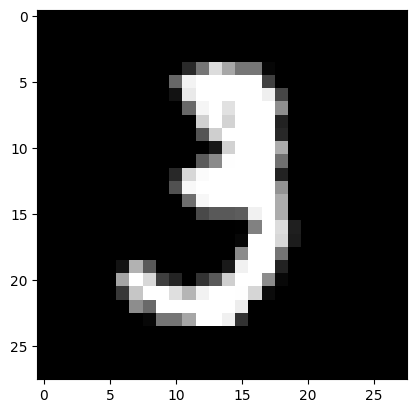

The label of 10th index is: 3


In [ ]:
#cv2_imshow(X_train[10])
# using plt.imshow as the size of cv2_imshow shows the original size of the image
plt.imshow(X_train[10], cmap="gray")
plt.show()

# print the corresponding label
print("The label of 10th index is:", Y_train[10])

In [ ]:
# unique values in Y_train and Y_test

print("The values present in the datasets are:",np.unique(Y_train))
print("The values present in the datasets are:",np.unique(Y_test))

The values present in the datasets are: [0 1 2 3 4 5 6 7 8 9]
The values present in the datasets are: [0 1 2 3 4 5 6 7 8 9]


We are not doing one hot encoding here because I want to see how NN work with multiclass labels on those doodles

In [ ]:
# Scaling the values so that they lie in range of [0,1] instead of [0,255] - NORMALIZATION
# easy to deal with

X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
# setting the layers of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),   # why flattening because we cant give matrix to the model we need to give single row array and the output
                                                # we get is also a flattened array, also here we have given 1 which is channel representing grayscale for colour put 3

    keras.layers.Dense(50,activation='relu'),  # 50 is number of neurons
    keras.layers.Dense(50, activation='relu'),  # again same of number 75, 80, 100, 1000 whatever
    keras.layers.Dense(10, activation='sigmoid') #output neurons we have 10 because this represent number of classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compiling the model with loss, optimizer, metrics

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])   # there are many optimizers SGD, heavy ball, NADAM, etc.
                                                                                                # here we use sparse_categorical_crossentropy for categorical
                                                                                                # for one hot encoding in that case categorical_crossentropy


In [ ]:
# training the neural network

model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8447 - loss: 0.5363
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9577 - loss: 0.1443
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9691 - loss: 0.1044
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9756 - loss: 0.0828
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9789 - loss: 0.0683
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9822 - loss: 0.0574
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9855 - loss: 0.0482
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9869 - loss: 0.0420
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9884 - loss: 0.0369
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9891 - loss: 0.0327


Training Data Accuracy is 98.91% and Loss is 0.0327


In [ ]:
# Training the test data

loss, accuracy = model.evaluate(X_test, Y_test)
print("The accuracy is of the model is :", accuracy)
print("the loss of the model is :", loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9667 - loss: 0.1427
The accuracy is of the model is : 0.9711999893188477
the loss of the model is : 0.12253572046756744


Training Data Accuracy is 97.11% and Loss is 0.12253
since accuracy is not low means model didnt overfit


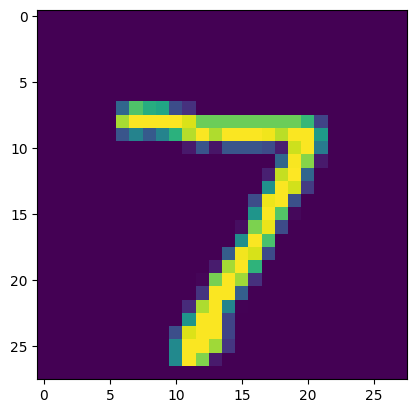

The label for this index test data is : 7


In [ ]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()
print("The label for this index test data is :",Y_test[0])

In [ ]:
Y_pred = model.predict(X_test) # storing all the values which model will be predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(Y_pred.shape)  # prediction value
# 10k images but what is this 10?
# here from 0,1,2,....10 we will get 10 probability value that our model will give and the highest one is selected for label prediciton

(10000, 10)


In [ ]:
print(Y_pred[0]) # here you can see that 7th index has highest value of probability then all

[4.9337494e-04 1.6086681e-02 6.8270750e-02 4.5979628e-01 1.2264876e-06
 3.1070784e-05 3.3136931e-11 9.9999869e-01 9.6832113e-03 9.9973166e-03]


model.predict gave us the probability of each class for the particular data point

In [ ]:
# converting the predictions probabilities of each class for that data point
y_pred_labels = [np.argmax(i) for i in Y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 7, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 1, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test -> True Labels
Y_pred -> Predicted Labels

In [ ]:
## Confusion Matrix
confusionmat = confusion_matrix(Y_test, y_pred_labels)

In [ ]:
print(confusionmat)

tf.Tensor(
[[ 956    1    1    1    4    1    7    1    5    3]
 [   0 1127    2    2    0    1    1    1    1    0]
 [   3    5  989    8    2    2    2   12    9    0]
 [   0    0    2  991    0    6    0    3    5    3]
 [   0    0    5    1  966    0    2    5    0    3]
 [   2    3    0   14    1  862    3    1    5    1]
 [   2    3    3    1   11    7  928    0    3    0]
 [   0    3    7    1    4    0    0 1003    3    7]
 [   1    1    4    5   11   10    1    3  933    5]
 [   0    7    0    7   24    5    0    6    3  957]], shape=(10, 10), dtype=int32)


Text(0.5, 25.722222222222214, 'Predicted Labels')

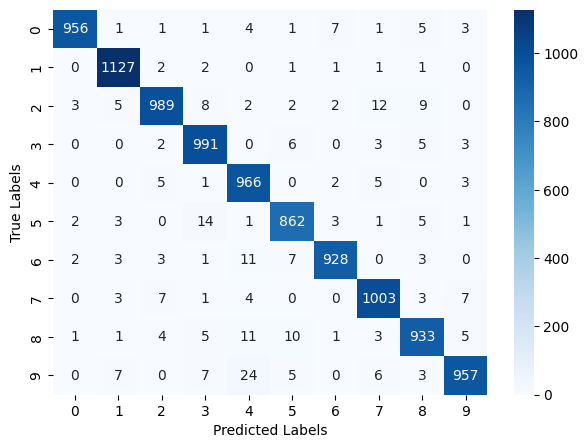

In [ ]:
# Building a Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(confusionmat, annot=True, fmt='d', cmap="Blues") #fmt -> d means integer
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

Building a predictive system

In [ ]:
input_image_path = '/content/Example-of-a-MNIST-input-An-image-is-passed-to-the-network-as-a-matrix-of-28-by-28.png'

In [ ]:
new_image = cv2.imread(input_image_path)
print(new_image.shape)   # we can see that shape of image is more than the requires size which out model requires as input so we have to resize it

(176, 176, 3)


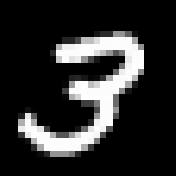

In [ ]:
cv2_imshow(new_image)

In [ ]:
new_image_resize = cv2.resize(new_image,(28,28))
print(new_image_resize.shape)
grayscale_image = cv2.cvtColor(new_image_resize, cv2.COLOR_RGB2GRAY)
print(grayscale_image.shape)

(28, 28, 3)
(28, 28)


In [ ]:
# Normalizing the Image
grayscale_image = grayscale_image/255

In [ ]:
# Reshaping the input to flatten it
flatten_grayscale_image = np.reshape(grayscale_image,[1,28,28])   # 1 image for dimesnion 28*28 this is for grayscale but if we do for colour then it should be
                                                                  # 1,28,28,3

In [ ]:
# prediction
input_prediction = model.predict(flatten_grayscale_image)
print(input_prediction)
input_prediction_label = np.argmax(input_prediction)
print("The hand written image is recognized as: ",input_prediction_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[6.7928036e-13 2.4193326e-04 7.1964557e-03 1.0000000e+00 1.3735064e-06
  8.0870703e-02 6.1957912e-18 1.2848311e-05 3.1087239e-04 9.5744395e-01]]
The hand written image is recognized as:  3
